In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Input data files are available in the read-only "../input/"directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

print("whats the shape",train_data.shape)
print("which columns have null values : \n",train_data.isnull().sum())


whats the shape (891, 12)
which columns have null values : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
train_data.fillna({"Age":train_data['Age'].mean()},inplace=True)

In [4]:
train_data.head()
train_data.isnull().sum()
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1,inplace=True)

The LabelEncoder from sklearn.preprocessing is used to convert categorical variables (usually strings) into numerical values, which machine learning algorithms can process. 

le.fit_transform(): This function first "fits" the LabelEncoder to the data, i.e., it learns the mapping from category labels (e.g., 'male', 'female') to integers. Then, it "transforms" the original categorical data into these numerical values.

In [5]:
# label encoding with 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [6]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**What is One-Hot Encoding?**

One-hot encoding is a technique used to convert categorical data into a format that can be provided to machine learning algorithms. It creates binary columns for each unique category in the original categorical column. This ensures that no ordinal relationship is assumed between categories.

For example, if the Embarked column has three possible values like ['S', 'C', 'Q'], one-hot encoding will create three new columns, where each column corresponds to one of the categories:

Embarked_S
Embarked_C
Embarked_Q

In [7]:
# we can do encoding for the embarked column
train_data.dropna(subset=['Embarked'],inplace=True)
train_data=train_data.reset_index(drop=True)
print("The current shape of train_Data",train_data.shape)

#encoding 
# Initialize OneHotEncoder and specify to return dense output (not sparse)
ohe=OneHotEncoder(sparse_output=False)
encoding=ohe.fit_transform(train_data[["Embarked"]])

# Convert the resulting encoding into a DataFrame with appropriate column names
temp_df=pd.DataFrame(encoding,columns=ohe.get_feature_names_out(['Embarked']))

# Concatenate the original DataFrame with the new one-hot-encoded columns
train_data=pd.concat([train_data,temp_df],axis=1)
train_data=train_data.drop(["Embarked"],axis=1)

train_data.head()

The current shape of train_Data (889, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


### 

# Visulization

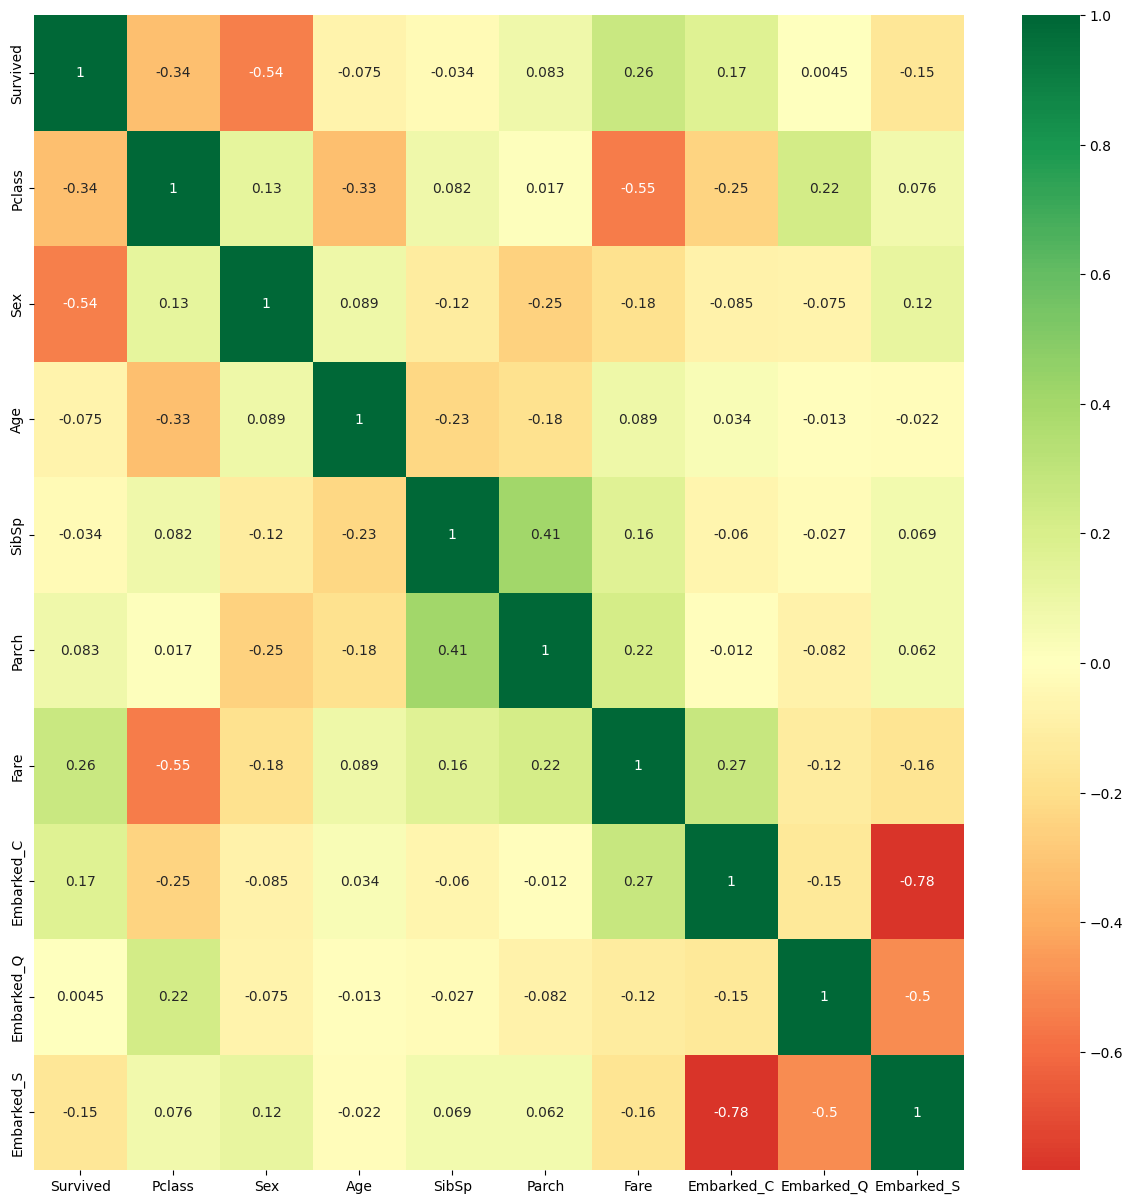

In [8]:
plt.figure(figsize=(15,15))
p=sns.heatmap(train_data.corr(),annot =True ,cmap='RdYlGn',center=0)

In [9]:
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]

In [10]:
print("x:",type(X),"y:",type(y))
X

x: <class 'pandas.core.frame.DataFrame'> y: <class 'pandas.core.series.Series'>


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0
885,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0
886,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0
887,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0


In [11]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=4, min_samples_leaf=3, 
                               max_features='sqrt', oob_score=True, random_state=42)
model.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=500, oob_score=True, random_state=42)

To test the model we will use data from test.csv but again we have do the encodings for the accordingly as we did for train data


In [12]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
test_data.fillna({"Age":test_data['Age'].mean()},inplace=True)

In [15]:
test_data.drop(["Name", "Ticket", "Cabin"],axis=1,inplace=True)
test_data=test_data.reset_index(drop=True)


In [16]:

# le endocing
test_data["Sex"]=le.fit_transform(test_data["Sex"])

# ohe encoding
encoding=ohe.transform(test_data[["Embarked"]])
temp_df=pd.DataFrame(encoding,columns=ohe.get_feature_names_out(["Embarked"]))

test_data=pd.concat([test_data,temp_df],axis=1)

test_data = test_data.drop(["Embarked"], axis = 1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,893,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,895,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,896,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


In [17]:
test_data['Fare'] = test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('mean'))


In [18]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [19]:
prediction=model.predict(test_data.drop(columns=["PassengerId"]))
test_data["Survived"]=prediction


In [20]:
test_data=test_data.loc[:,['PassengerId','Survived']]

test_data['Survived'].value_counts()

Survived
0    273
1    145
Name: count, dtype: int64

In [21]:
test_data=test_data.head(418)
test_data.to_csv("submission.csv",index=False)

In [22]:
model.oob_score_

0.829021372328459